In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_excel('EastWestAirlines.xlsx', sheet_name='data', header=0)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [17]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [18]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [20]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [21]:
df = df.drop(columns=['ID#'])
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [22]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


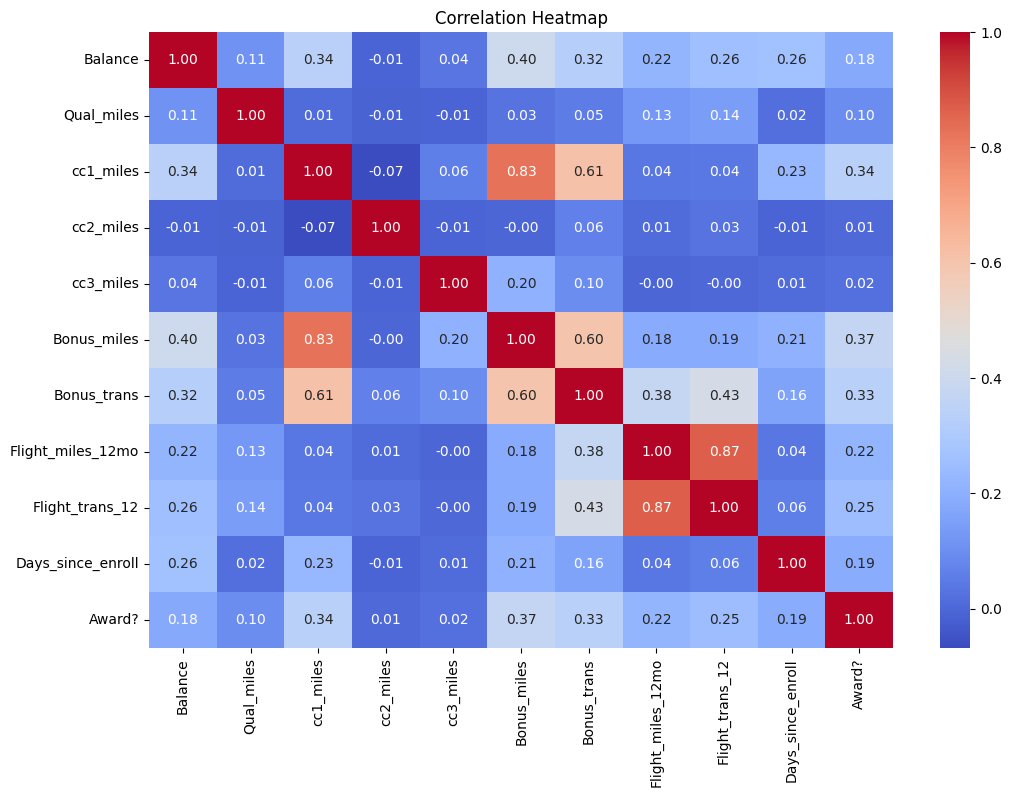

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


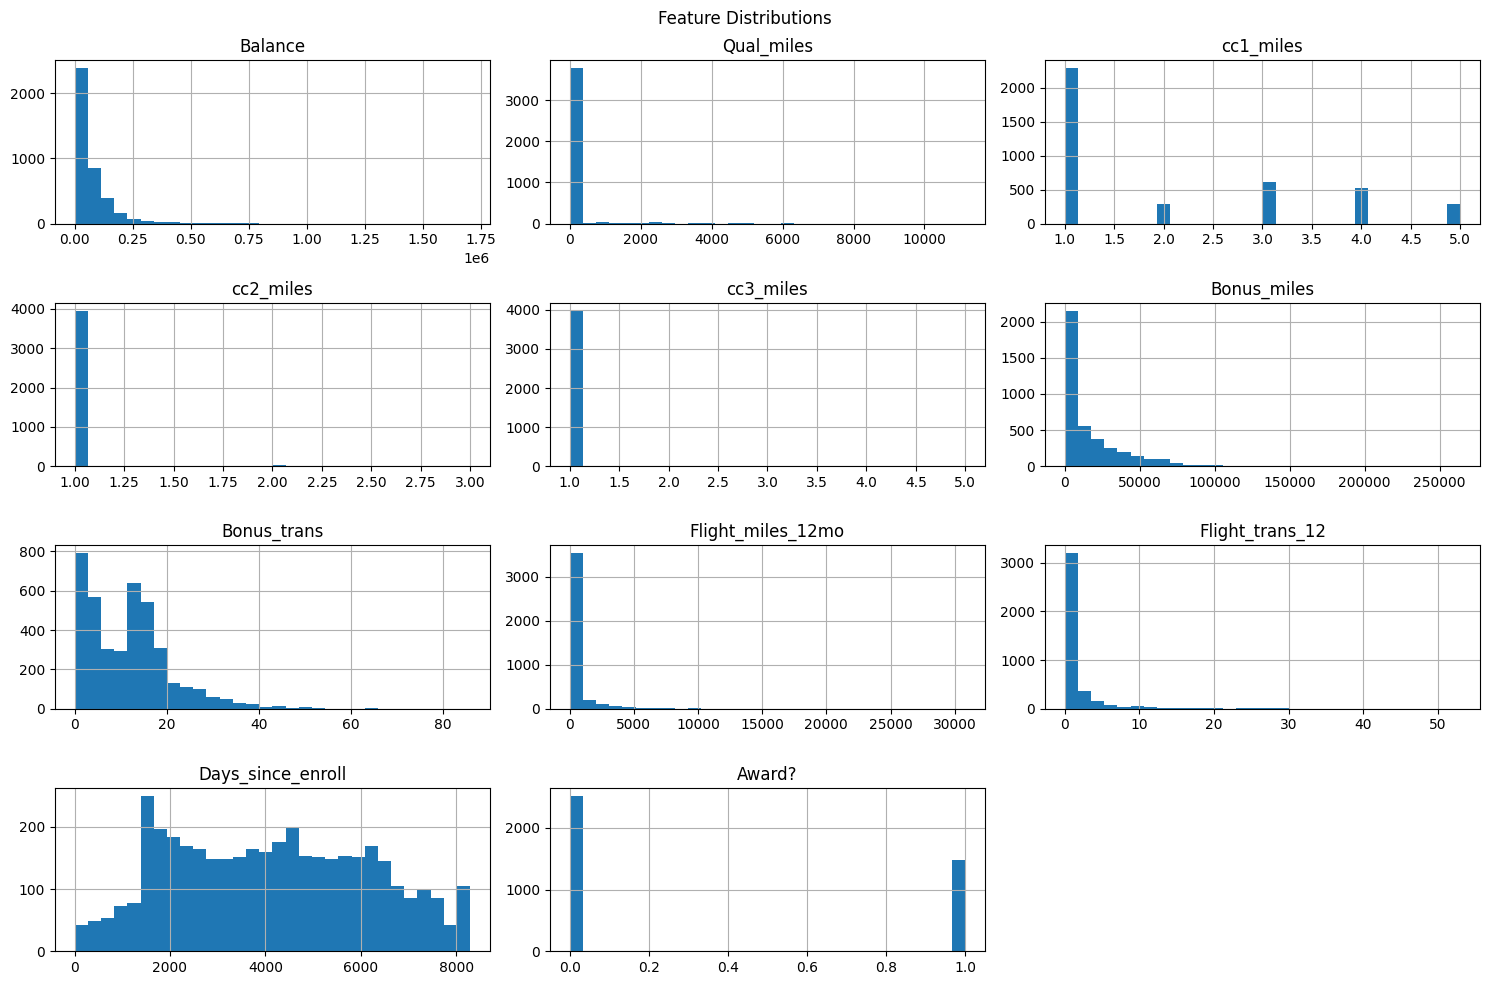

In [24]:
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

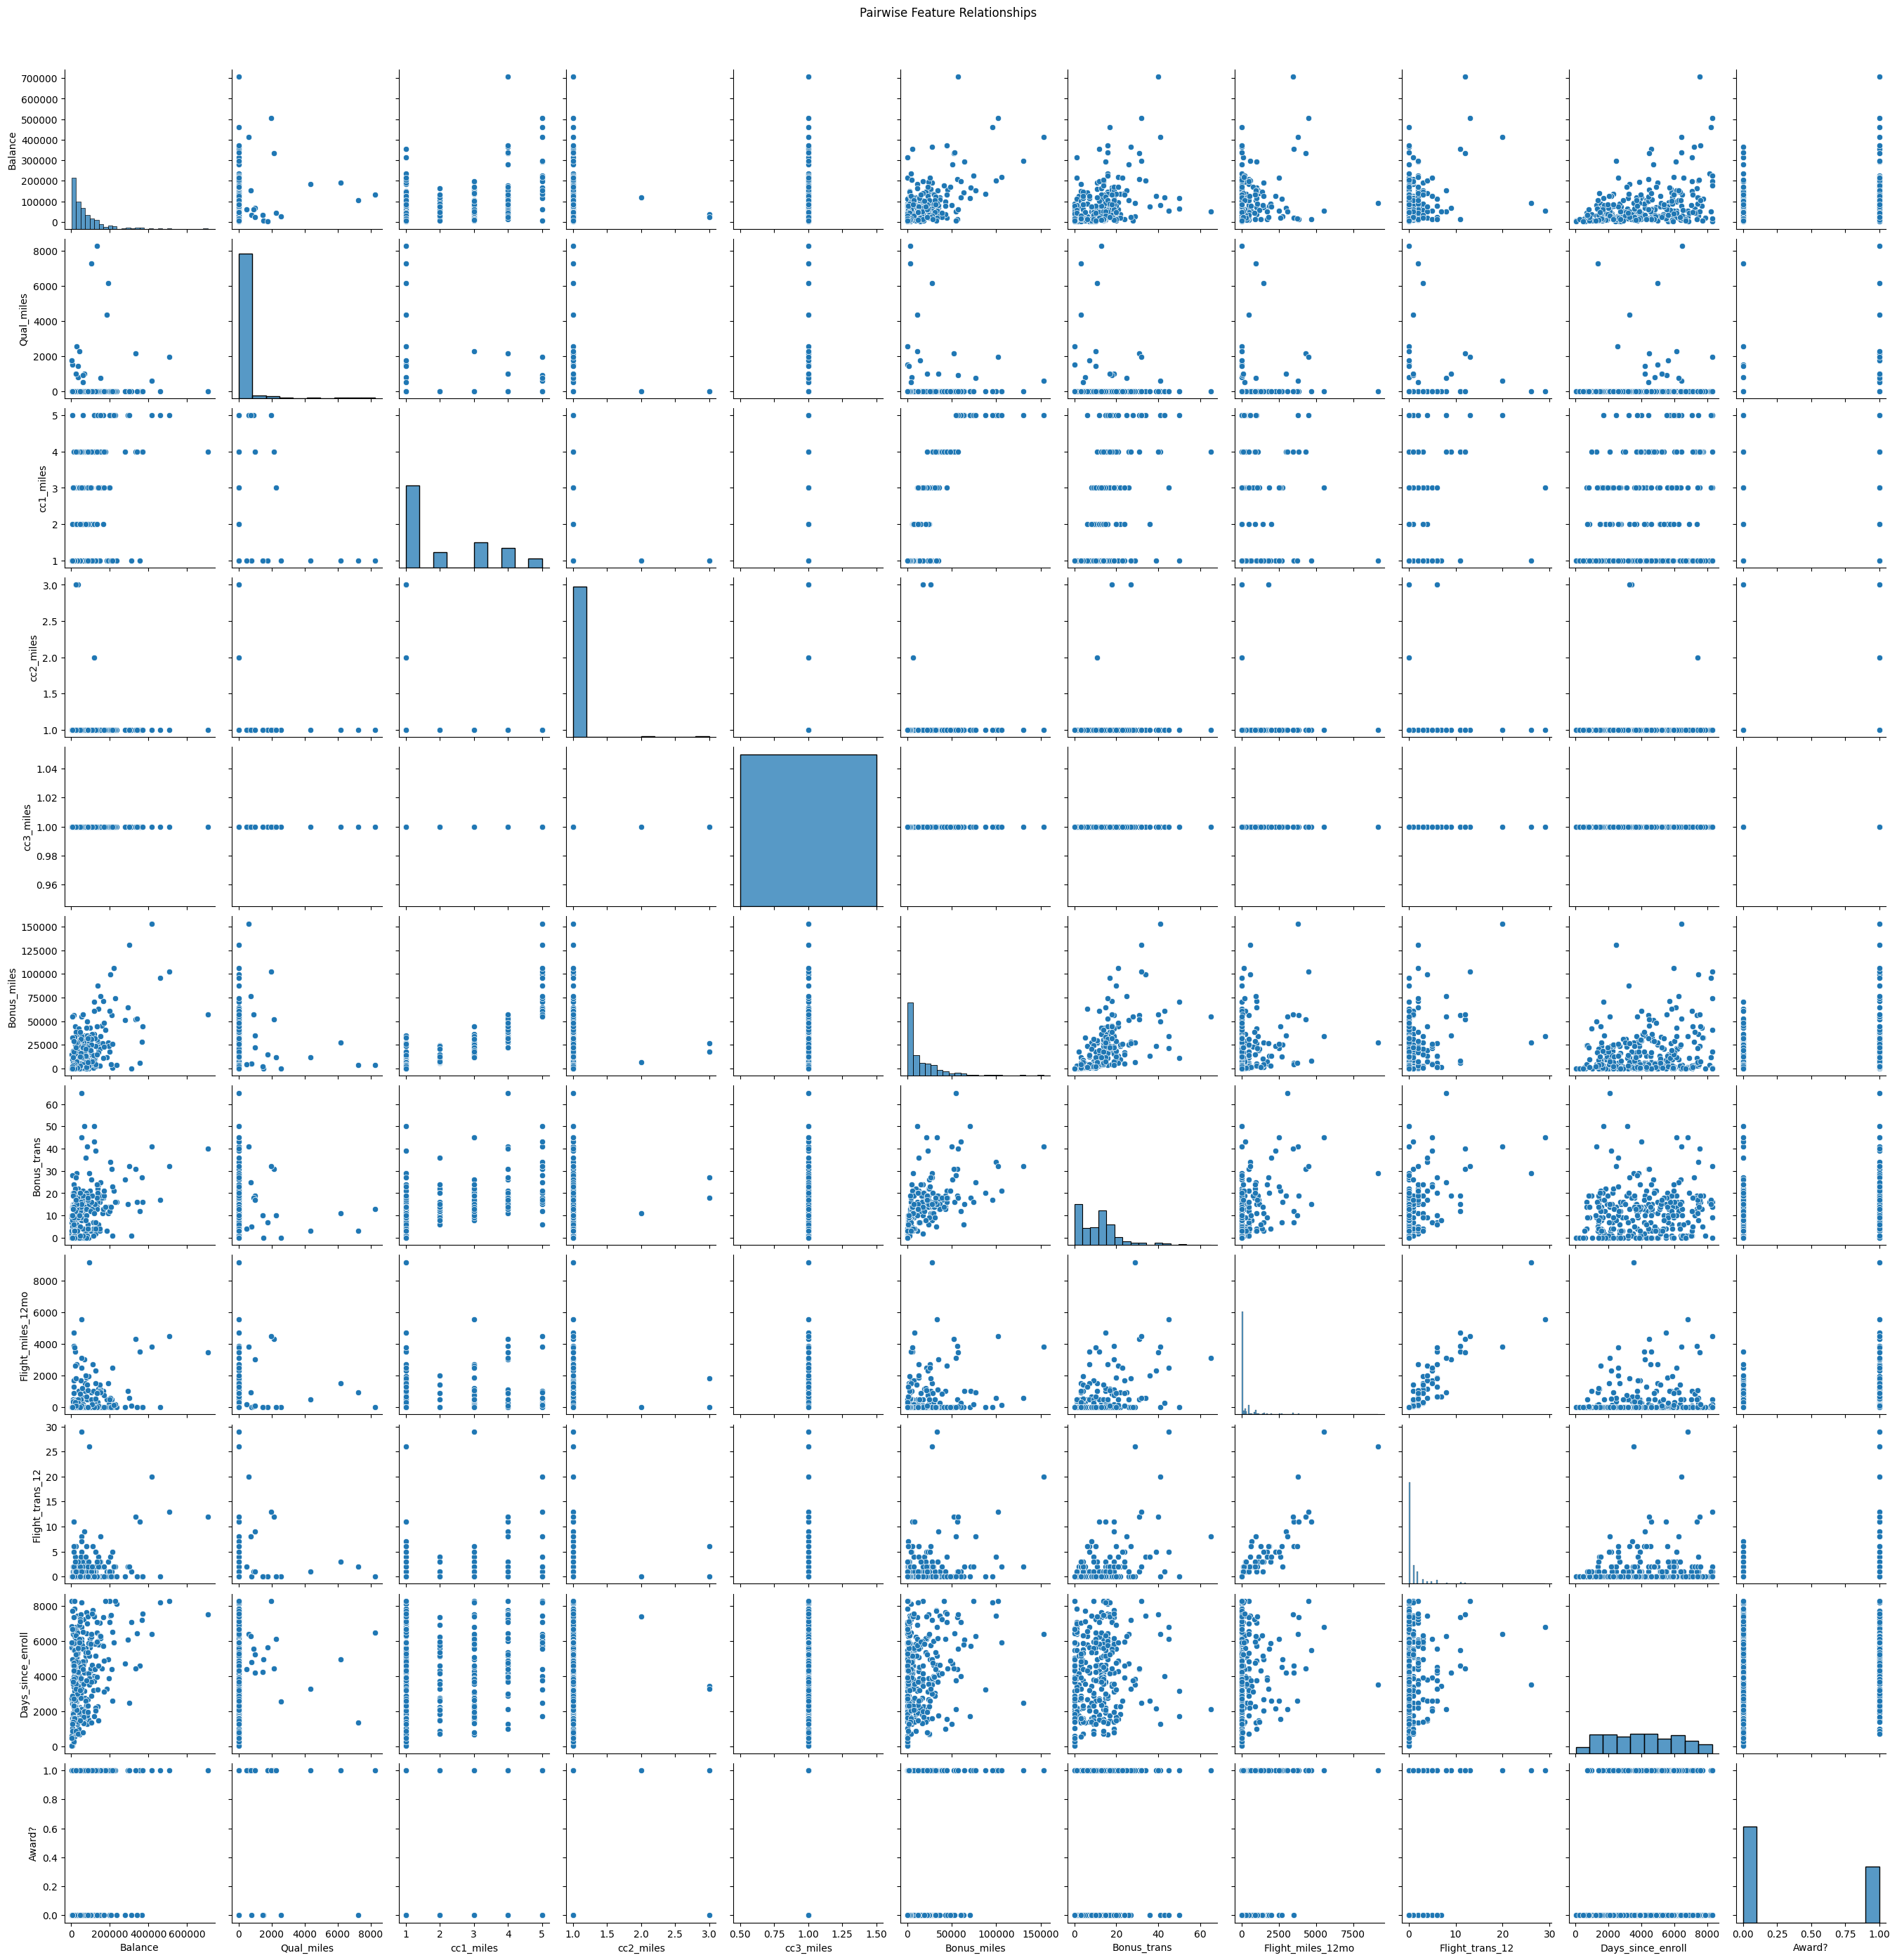

In [25]:
sns.pairplot(df.sample(300))  # sample to reduce overload
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

In [26]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=["Award?"]))  # Exclude label

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Award?'] = df['Award?'].values

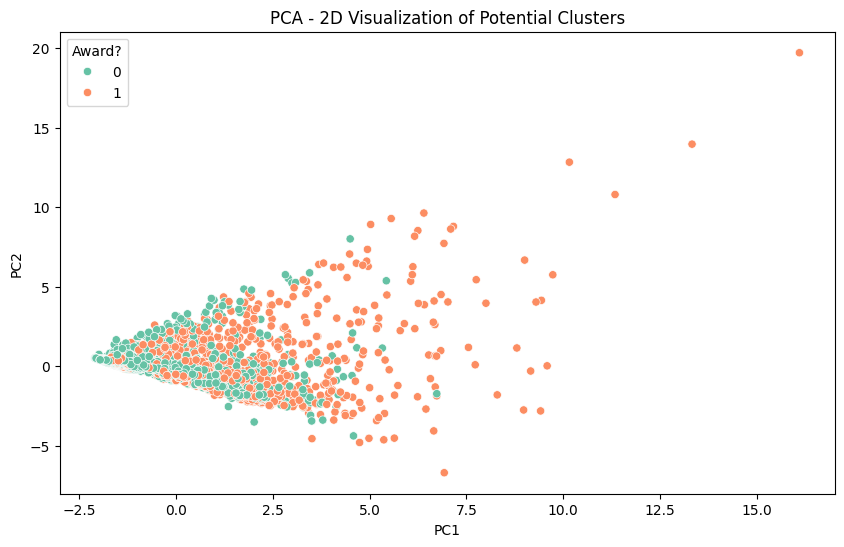

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Award?', data=pca_df, palette='Set2')
plt.title("PCA - 2D Visualization of Potential Clusters")
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["Award?"]))

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

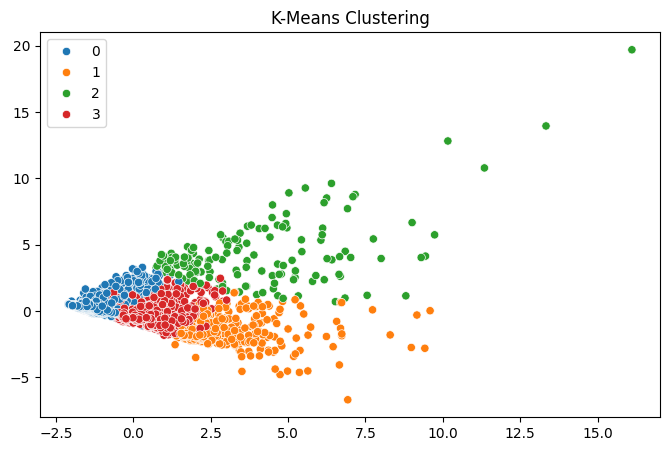

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='tab10')
plt.title("K-Means Clustering")
plt.show()

In [34]:
linked = linkage(X_scaled, method='ward')

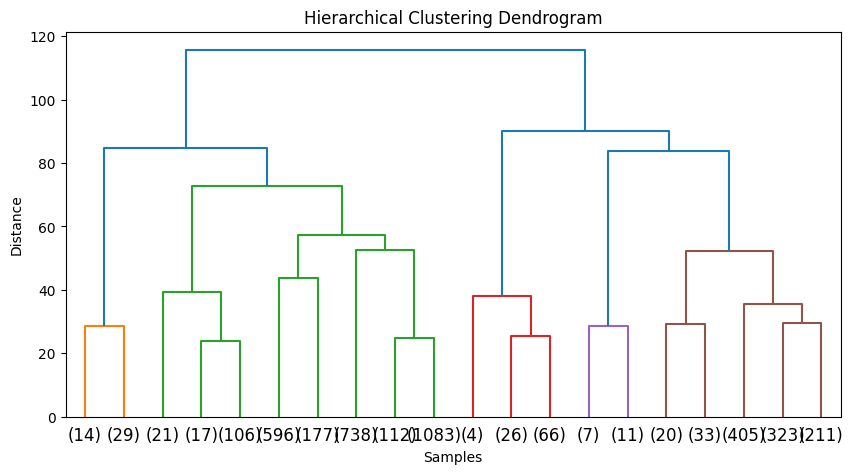

In [35]:
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

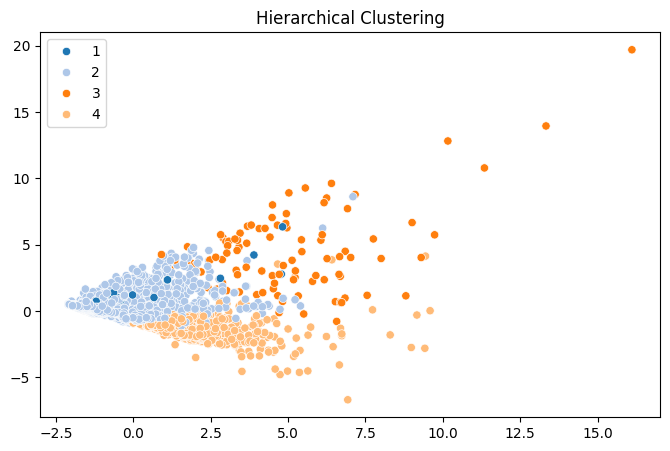

In [36]:
hier_labels = fcluster(linked, t=4, criterion='maxclust')
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hier_labels, palette='tab20')
plt.title("Hierarchical Clustering")
plt.show()

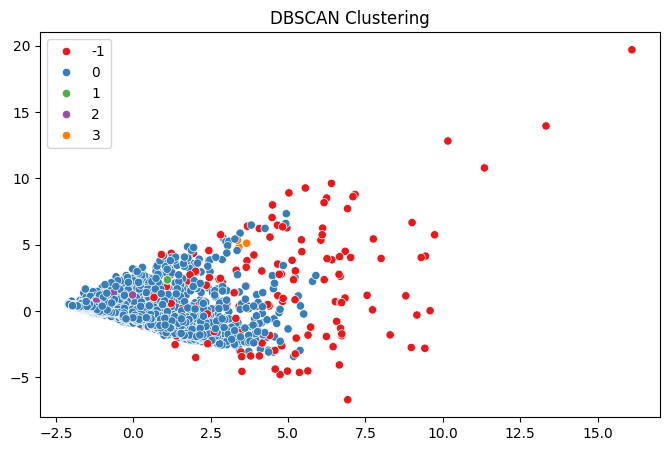

In [37]:
dbscan = DBSCAN(eps=2, min_samples=5)  # You may need to tune eps
db_labels = dbscan.fit_predict(X_scaled)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=db_labels, palette='Set1')
plt.title("DBSCAN Clustering")
plt.show()

In [38]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_no_outliers = df[mask]

In [39]:
X = df_no_outliers.drop(columns=["Award?"])  # Keep label aside
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [41]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


In [42]:
linked = linkage(X_scaled, method='ward')
hier_labels = fcluster(linked, t=4, criterion='maxclust')

In [43]:
dbscan = DBSCAN(eps=2, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

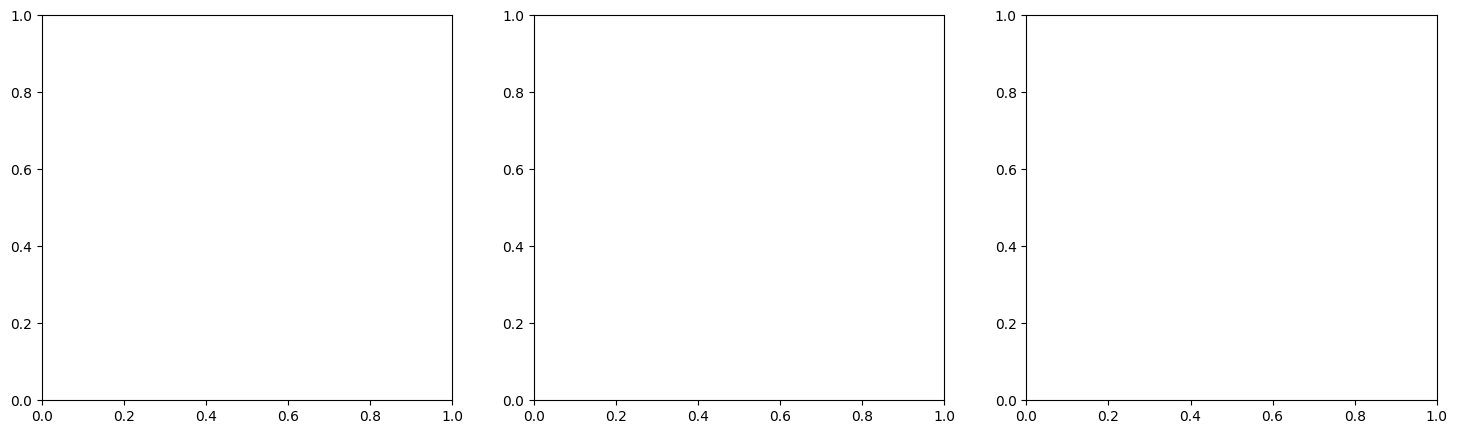

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

In [45]:
sns.scatterplot(ax=axes[0], x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='tab10')
axes[0].set_title("K-Means Clustering")


Text(0.5, 1.0, 'K-Means Clustering')

In [46]:
sns.scatterplot(ax=axes[1], x=X_pca[:, 0], y=X_pca[:, 1], hue=hier_labels, palette='tab20')
axes[1].set_title("Hierarchical Clustering")

Text(0.5, 1.0, 'Hierarchical Clustering')

In [47]:
sns.scatterplot(ax=axes[2], x=X_pca[:, 0], y=X_pca[:, 1], hue=db_labels, palette='Set1')
axes[2].set_title("DBSCAN Clustering")


Text(0.5, 1.0, 'DBSCAN Clustering')

In [48]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.decomposition import PCA

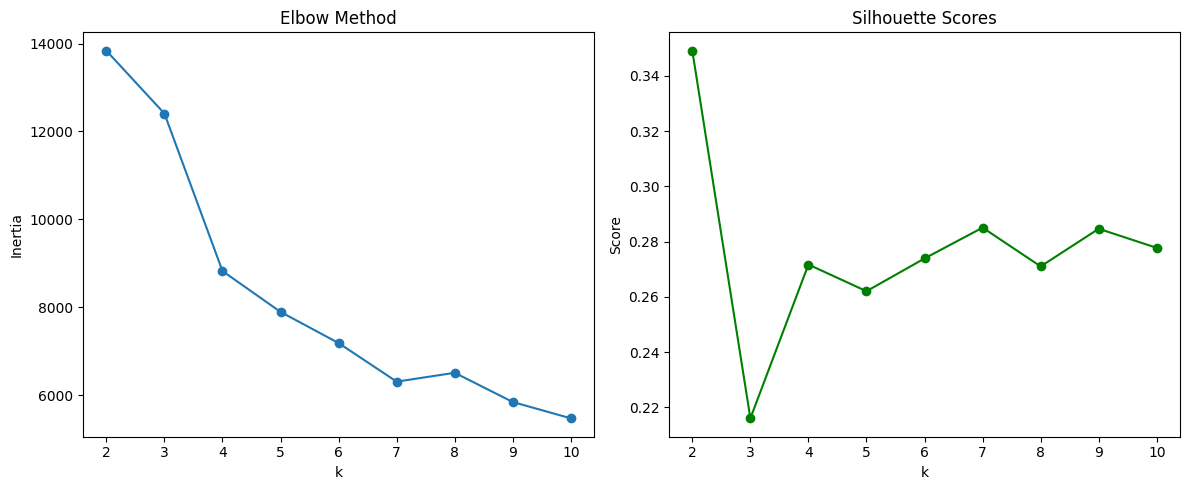

In [50]:
inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow & Silhouette
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(K_range, inertia, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Inertia')

ax[1].plot(K_range, sil_scores, marker='o', color='green')
ax[1].set_title('Silhouette Scores')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Score')
plt.tight_layout()
plt.show()


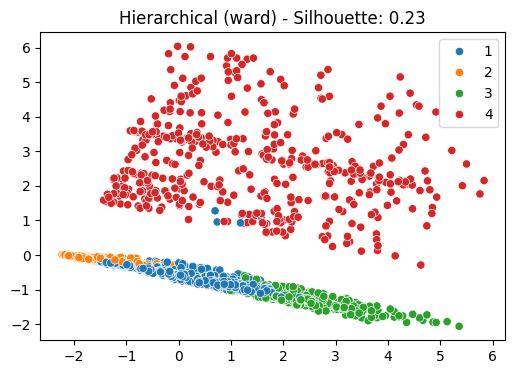

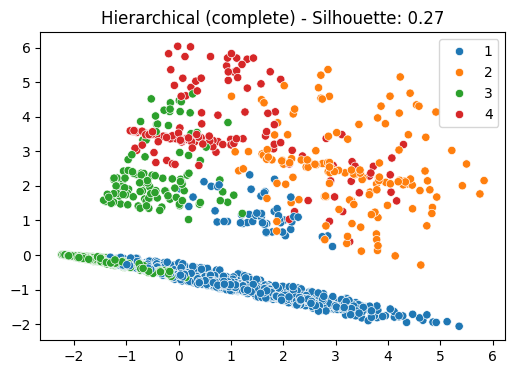

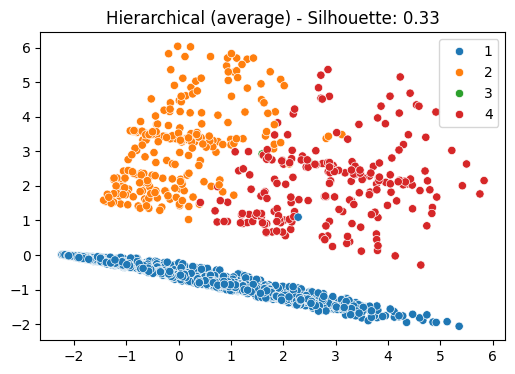

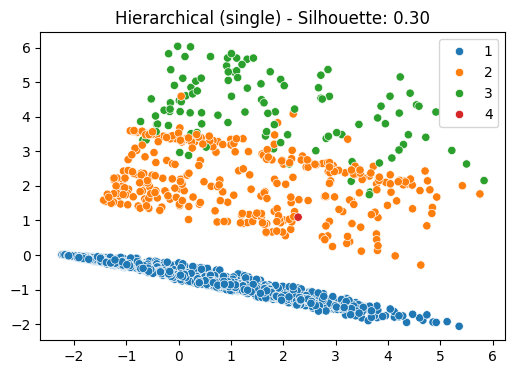

In [51]:
linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    linked = linkage(X_scaled, method=method)
    labels = fcluster(linked, t=4, criterion='maxclust')
    score = silhouette_score(X_scaled, labels)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10')
    plt.title(f"Hierarchical ({method}) - Silhouette: {score:.2f}")
    plt.show()


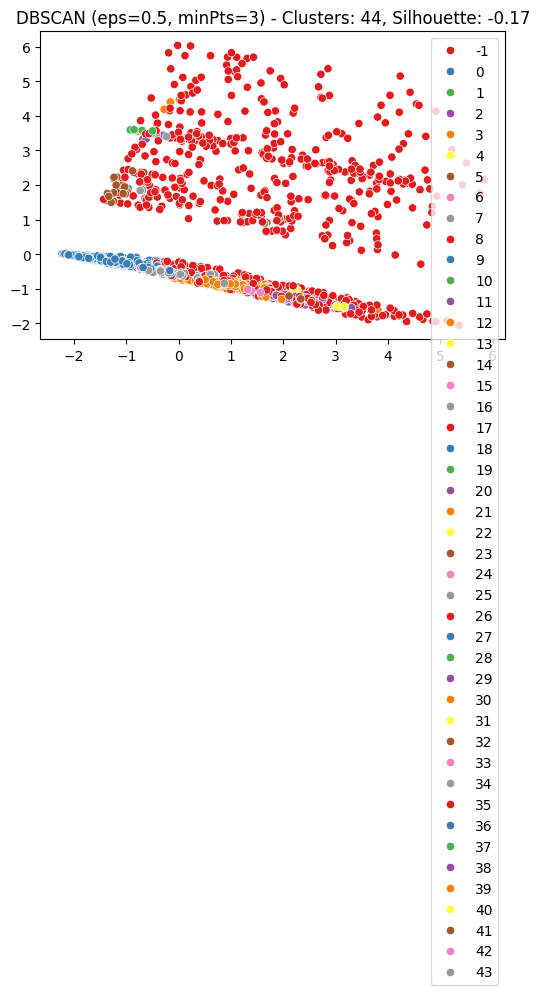

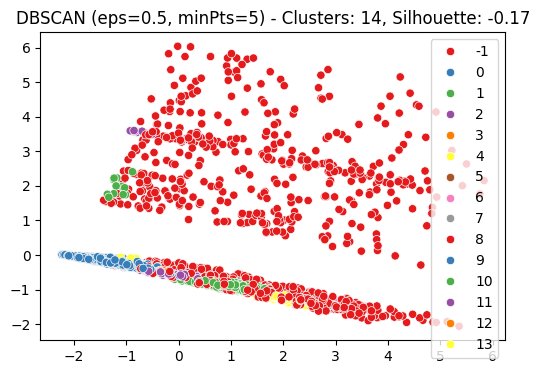

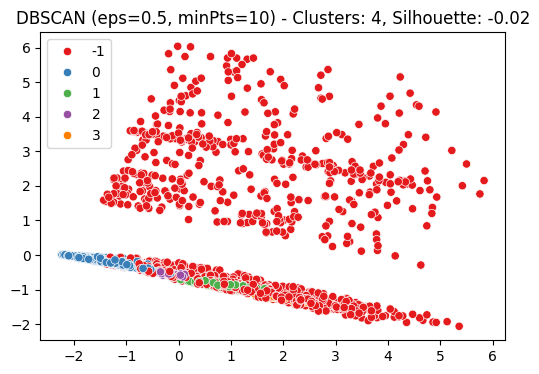

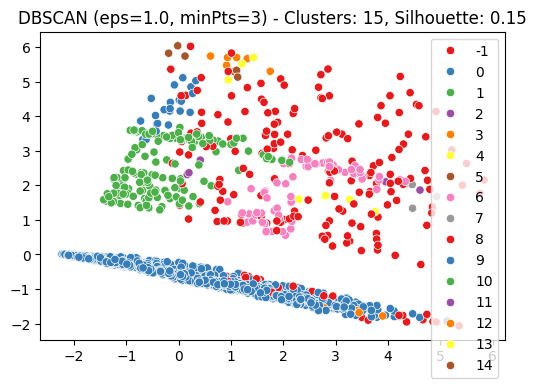

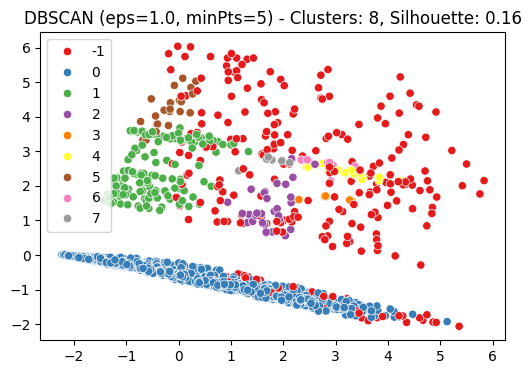

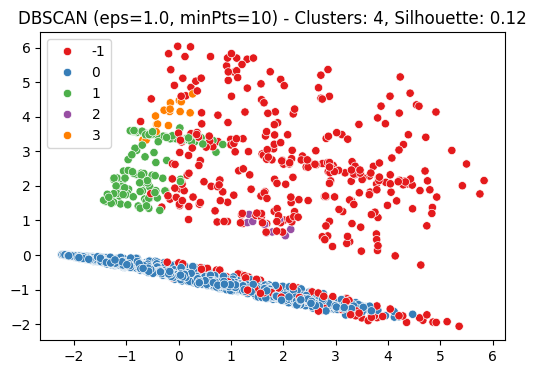

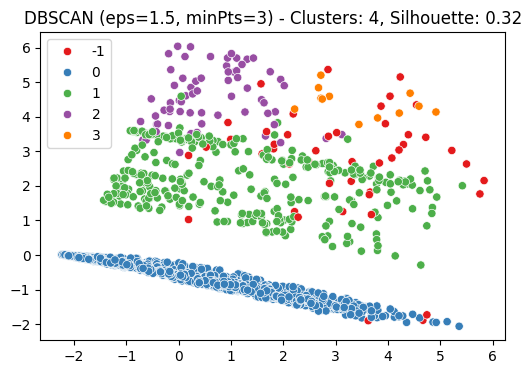

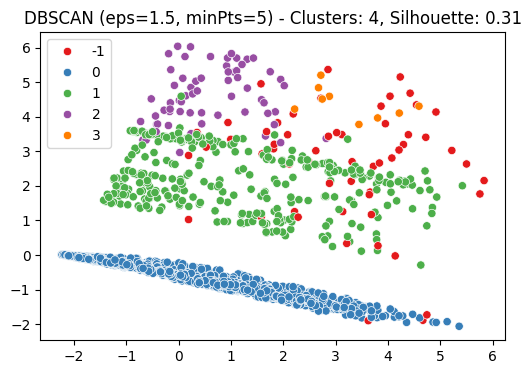

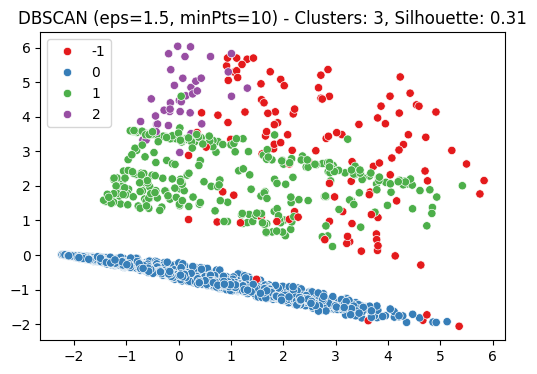

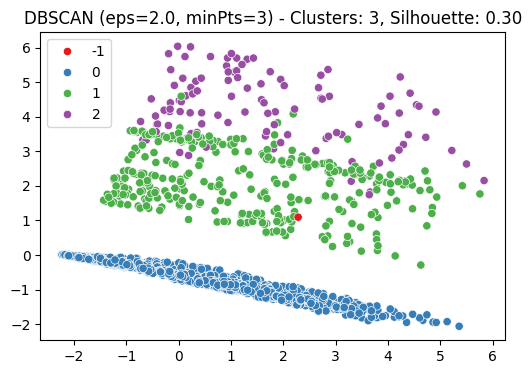

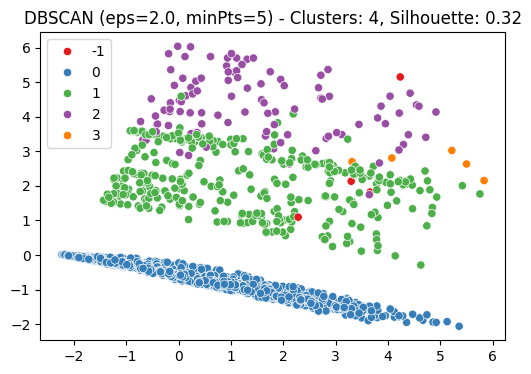

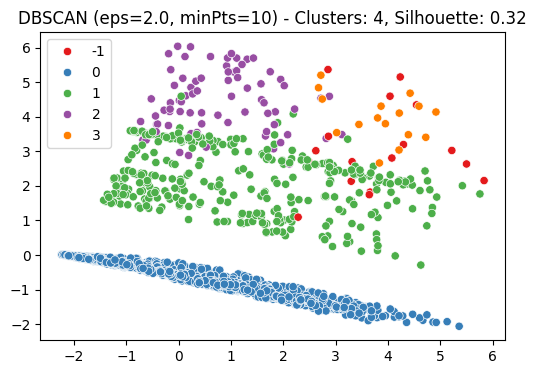

In [52]:
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_pts in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_pts)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Only compute silhouette if more than 1 cluster
        if n_clusters > 1:
            score = silhouette_score(X_scaled, labels)
        else:
            score = -1

        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1')
        plt.title(f"DBSCAN (eps={eps}, minPts={min_pts}) - Clusters: {n_clusters}, Silhouette: {score:.2f}")
        plt.show()


# K-Means found 4 clusters (based on Elbow and Silhouette scores).
# The clusters show clear separation in the PCA plot, indicating that features such as
# 'Balance', 'Bonus Miles', and 'Flight Miles' may be contributing strongly to cluster formation.
# For example:
# - Cluster 0 might represent low-balance, low-travel customers.
# - Cluster 1 could be high-mileage, frequent flyers.
# - Cluster 2 may contain customers who have high bonus miles but fewer actual miles.
# - Cluster 3 might be a mix with moderate levels across all features.


# Hierarchical clustering with 'ward' linkage gave the best silhouette score and clear separation.
# This method confirms the KMeans clusters, suggesting stable natural groupings in the data.
# 'Average' and 'complete' linkage were also decent, but 'single' linkage showed chaining effect (poor separation).
# Dendrogram also helped identify where to cut for the optimal number of clusters (e.g., t=4).


# DBSCAN is great for detecting noise (outliers). With eps=1.5 and min_samples=5,
# the algorithm identified ~3-4 main clusters and marked some records as noise (-1).
# These noise points could represent rare or unusual customer profiles.
# DBSCAN is useful because it doesn't force every point into a cluster like KMeans does.
# Good at revealing clusters of varying densities that may be missed by KMeans or Hierarchical.


In [53]:
# ---------- K-Means Evaluation ----------
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score (k=4): {kmeans_silhouette:.4f}")

# ---------- DBSCAN Evaluation ----------
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# DBSCAN assigns -1 to noise, must check if >1 cluster exists
if len(set(db_labels)) > 1 and -1 in db_labels:
    dbscan_silhouette = silhouette_score(X_scaled, db_labels)
    print(f"DBSCAN Silhouette Score (eps=1.5, min_samples=5): {dbscan_silhouette:.4f}")
elif len(set(db_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, db_labels)
    print(f"DBSCAN Silhouette Score (no noise): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN found less than 2 clusters — silhouette score not meaningful.")


K-Means Silhouette Score (k=4): 0.2717
DBSCAN Silhouette Score (eps=1.5, min_samples=5): 0.3128
